In [5]:
using XLSX, DataFrames, TimeSeries
using StatsBase
using Plots, StatsPlots
using LinearAlgebra
using GLM
using FredData
include("utils.jl")


print_percentiles (generic function with 1 method)

In [209]:
columns = [:Date, :short_pl, :short_us, :short_ez, :cpi_pl, :cpi_us, :cpi_ez, :real_pln, :real_us, :real_ez, :term_pln, :term_us,	:term_ez, :real_pln_usa, :real_pln_ez,	:usdpln,	:eurpln,	:usdpln_ret,	:eurpln_ret, :real_usdpln, :real_eurpln, :real_usdpln_ret, :real_eurpln_ret]

23-element Vector{Symbol}:
 :Date
 :short_pl
 :short_us
 :short_ez
 :cpi_pl
 :cpi_us
 :cpi_ez
 :real_pln
 :real_us
 :real_ez
 ⋮
 :real_pln_ez
 :usdpln
 :eurpln
 :usdpln_ret
 :eurpln_ret
 :real_usdpln
 :real_eurpln
 :real_usdpln_ret
 :real_eurpln_ret

In [210]:
data_df = DataFrame(XLSX.readtable("assets_data_03.24.xlsx", "Macro_Data_2001"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)

Row,Date,short_pl,short_us,short_ez,cpi_pl,cpi_us,cpi_ez,real_pln,real_us,real_ez,term_pln,term_us,term_ez,real_pln_usa,real_pln_ez,usdpln,eurpln,usdpln_ret,eurpln_ret,real_usdpln,real_eurpln,real_usdpln_ret,real_eurpln_ret
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2001-04-01,0.168,0.0409667,0.0459075,0.0186196,0.0104344,0.0143379,0.0226936,-0.000190774,-0.00282452,-0.0562333,0.0117333,0.00599977,0.0228844,0.0255181,4.0069,3.5945,-0.0203897,-0.0695056,1.37995,1.27519,-0.018214,-0.0495814
2,2001-07-01,0.151567,0.0333667,0.0426784,-0.000630346,0.00131427,0.000642508,0.037822,0.00699366,0.00997077,-0.0344333,0.0164333,0.00847386,0.0308283,0.0278512,4.2283,3.4059,0.0552547,-0.052469,1.44374,1.22678,0.0462293,-0.0379633
3,2001-10-01,0.127333,0.0205667,0.0344348,0.00599186,-0.00281265,0.00346732,0.0253632,0.00794511,0.00511054,-0.0332333,0.0271333,0.0137062,0.0174181,0.0202526,3.9623,3.8469,-0.0629094,0.129481,1.36803,1.34475,-0.05244,0.0961645
4,2002-01-01,0.104,0.0182333,0.0336222,0.0112852,0.00357282,0.00691067,0.0144457,0.000981528,0.00148353,-0.0209333,0.0325333,0.0177293,0.0134642,0.0129622,4.1183,3.5272,0.0393711,-0.0831059,1.40778,1.25617,0.0290569,-0.065875
5,2002-04-01,0.0955667,0.0183333,0.0344601,0.00371981,0.0108675,0.00991357,0.0198978,-0.00623603,-0.00128662,-0.0163,0.0326667,0.0180907,0.0261339,0.0211844,4.0537,3.5879,-0.0156861,0.0172091,1.40673,1.28372,-0.000752139,0.0219315
6,2002-07-01,0.0825,0.0176,0.0335735,-0.00926499,0.00426319,0.000629247,0.0297234,0.000136223,0.0077293,-0.0104,0.025,0.0140323,0.0295871,0.0219941,4.1466,4.018,0.0229173,0.119875,1.43585,1.40072,0.0207041,0.0911434
7,2002-10-01,0.0688333,0.0148667,0.0310882,0.00311721,0.00313765,0.00540812,0.0139496,0.000577035,0.00234844,-0.00903333,0.0252,0.0143196,0.0133725,0.0116011,3.828,4.0944,-0.076834,0.0190144,1.34236,1.4119,-0.0651099,0.00798152
8,2003-01-01,0.0624,0.0126333,0.0268307,0.00559352,0.0101196,0.00713035,0.00990164,-0.00691543,-0.00041976,-0.00626667,0.0265667,0.0146969,0.0168171,0.0103214,4.1005,4.0152,0.071186,-0.0193435,1.4156,1.39161,0.0545582,-0.0143686
9,2003-04-01,0.0554333,0.0116667,0.0236191,0.00370831,0.00364298,0.00670724,0.0100617,-0.00072394,-0.000797437,-0.00356667,0.0245333,0.0159505,0.0107857,0.0108592,3.8988,4.4732,-0.0491891,0.114067,1.3606,1.50109,-0.03885,0.0786663


In [211]:
data = from(TimeArray(data_df,timestamp=:Date), Date(2001,01,01))

92×22 TimeArray{Float64, 2, Date, Matrix{Float64}} 2001-04-01 to 2024-01-01
┌────────────┬───────────┬────────────┬─────────────┬──────────────┬────────────
│            │ short_pl  │ short_us   │ short_ez    │ cpi_pl       │ cpi_us    ⋯
├────────────┼───────────┼────────────┼─────────────┼──────────────┼────────────
│ 2001-04-01 │     0.168 │  0.0409667 │   0.0459075 │    0.0186196 │   0.01043 ⋯
│ 2001-07-01 │  0.151567 │  0.0333667 │   0.0426784 │ -0.000630346 │  0.001314 ⋯
│ 2001-10-01 │  0.127333 │  0.0205667 │   0.0344348 │   0.00599186 │ -0.002812 ⋯
│ 2002-01-01 │     0.104 │  0.0182333 │   0.0336222 │    0.0112852 │  0.003572 ⋯
│ 2002-04-01 │ 0.0955667 │  0.0183333 │   0.0344601 │   0.00371981 │   0.01086 ⋯
│ 2002-07-01 │    0.0825 │     0.0176 │   0.0335735 │  -0.00926499 │  0.004263 ⋯
│ 2002-10-01 │ 0.0688333 │  0.0148667 │   0.0310882 │   0.00311721 │  0.003137 ⋯
│ 2003-01-01 │    0.0624 │  0.0126333 │   0.0268307 │   0.00559352 │   0.01011 ⋯
│     ⋮      │     ⋮     │     ⋮ 

In [217]:
returns_summarystats(data,4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.0591449,0.672,0.173138,0.231633,0.0084,1.5415,0.0691667,0.871724,4.05329,2.92734,0.168267
short_us,0.0353154,0.217067,0.0716732,0.111667,0.004,0.896898,0.0110667,0.934226,-0.517743,2.02951,0.0481333
short_ez,0.0341877,0.199272,0.0555342,0.105789,-0.0226551,0.54757,-0.0119504,0.944151,-1.04849,1.62439,0.0348823
cpi_pl,0.0221224,0.234824,0.0312711,0.0486651,-0.03706,1.79672,0.00480694,0.579695,4.7113,1.41355,0.0211554
cpi_us,0.0155039,0.118955,0.024932,0.0430595,-0.113141,-0.485537,0.0101801,0.283503,3.84985,1.60812,0.0216014
cpi_ez,0.015521,0.133927,0.0211917,0.0405046,-0.043131,0.710784,0.000135418,-0.00284896,0.781346,1.36535,0.0148005
real_pln,0.0239747,0.151288,0.0120326,0.0378602,-0.163089,-0.569901,-0.00616193,0.651849,1.92952,0.50189,0.0179574
real_us,0.0171695,0.14284,-0.00689676,0.0103016,-0.103543,0.525563,-0.0237883,0.387026,3.77568,-0.401686,-0.00595212
real_ez,0.0170712,0.0515112,-0.00719459,0.0172487,-0.135312,-0.959305,-0.0274199,0.175829,1.18709,-0.421446,-0.00117863
term_pln,0.0252217,0.0846667,0.0213937,0.0550985,-0.224933,-2.01327,-0.002,0.788002,6.08984,0.848229,0.036


In [223]:
returns_summarystats(to(from(data, Date(2003,01,01)),Date(2021,12,31)),4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.0374357,0.270933,0.13776,0.198067,0.0084,0.00384634,0.0689,0.951841,-1.14421,3.6799,0.155133
short_us,0.0328049,0.216933,0.0597781,0.0915333,0.004,1.21477,0.0089,0.965686,0.311519,1.82223,0.0336667
short_ez,0.0318099,0.199272,0.0437574,0.0853031,-0.0226551,0.931225,-0.0123812,0.964752,-0.208231,1.37559,0.0204143
cpi_pl,0.0147971,0.106706,0.0237206,0.0411838,-0.0261509,0.557814,0.0042262,0.215214,-0.268839,1.60306,0.0190946
cpi_us,0.0151356,0.0935912,0.0226716,0.0425398,-0.113141,-0.945026,0.0091244,0.191317,4.22923,1.4979,0.0209409
cpi_ez,0.013775,0.0692464,0.0168758,0.0334347,-0.043131,0.216989,-0.00405125,-0.355238,-0.737886,1.2251,0.0118147
real_pln,0.0165796,0.0727218,0.010706,0.0355084,-0.0875466,-0.767673,-0.00507637,0.372359,0.668582,0.645733,0.012391
real_us,0.0165739,0.14284,-0.00761145,0.00961758,-0.0915132,1.16406,-0.0237883,0.289923,4.99669,-0.459244,-0.00848074
real_ez,0.0147544,0.0515112,-0.0058541,0.0168884,-0.0743217,-0.429143,-0.0256302,-0.17988,-0.313055,-0.396769,-0.00206505
term_pln,0.0140775,0.0846667,0.0374661,0.0592667,-0.0250667,-0.474649,0.0187,0.808909,-0.675652,2.66142,0.0420261


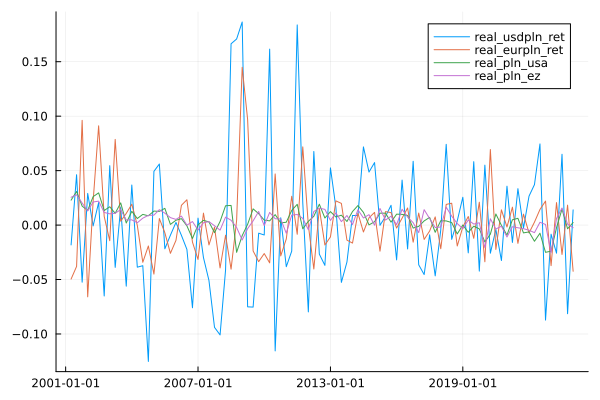

In [234]:
plot(data[[:real_usdpln_ret, :real_eurpln_ret, :real_pln_usa, :real_pln_ez]])